In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset
df = pd.read_csv('telco_final.csv')
telco_final = df
df

,Unnamed: 0,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason,Population,Unemployment Rate
0,0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,...,0.00,59.65,3,Churned,Yes,1,Competitor,Competitor offered more data,64147.0,5.4%
1,1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,...,390.80,1024.10,3,Churned,Yes,1,Competitor,Competitor made better offer,52008.0,6.9%
2,2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,...,203.94,1910.88,2,Churned,Yes,1,Competitor,Competitor made better offer,44897.0,7.3%
3,3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,...,494.00,2995.07,2,Churned,Yes,1,Dissatisfaction,Limited range of services,23370.0,8.0%
4,4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,...,234.21,3102.36,2,Churned,Yes,1,Price,Extra data charges,25949.0,5.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2569-WGERO,Female,30,No,No,No,No,0,United States,...,1639.44,3039.53,5,Stayed,No,0,NaN,NaN,2726.0,13.6%
7039,7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,...,865.20,2807.47,3,Stayed,No,0,NaN,NaN,38565.0,8.7%
7040,7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,...,2135.52,9453.04,4,Stayed,No,0,NaN,NaN,0.0,NaN
7041,7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,...,0.00,319.21,4,Stayed,No,0,NaN,NaN,500.0,NaN


## Visualizations

We have explored different visualizations first and then went on to clean the data based on the insights from the plots.

In [53]:
telco_churn_hist = telco_final[~telco_final['Churn Reason'].isna()]

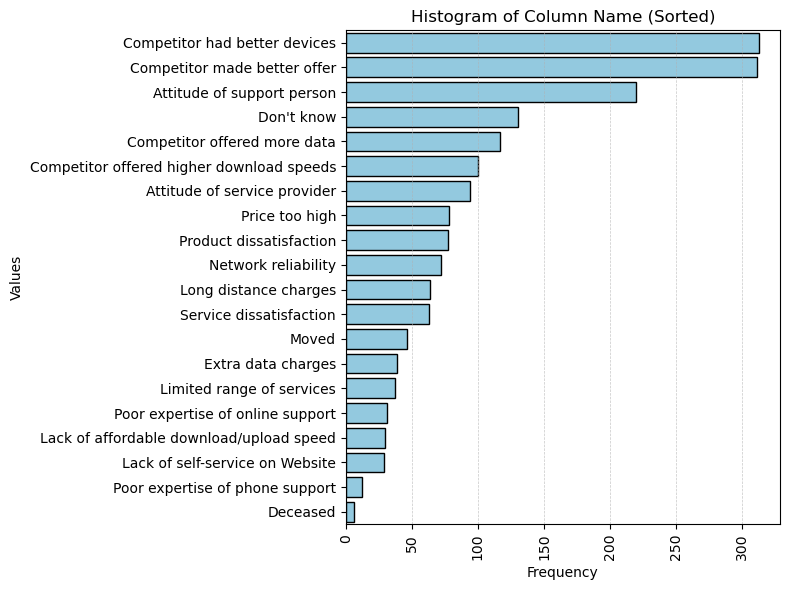

In [54]:
# Set a custom color palette
custom_palette = sns.color_palette('Blues', len(telco_churn_hist['Churn Reason'].unique()))

# Plot histogram with vertical x-axis labels
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_churn_hist, y='Churn Reason', color='skyblue', edgecolor='black', order=telco_churn_hist['Churn Reason'].value_counts().index)
plt.title('Histogram of Column Name (Sorted)')
plt.xlabel('Frequency')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

The plot shows the major reasons for customers churning away. Competitor had better devices and competitor has better prices came out as top reasons.

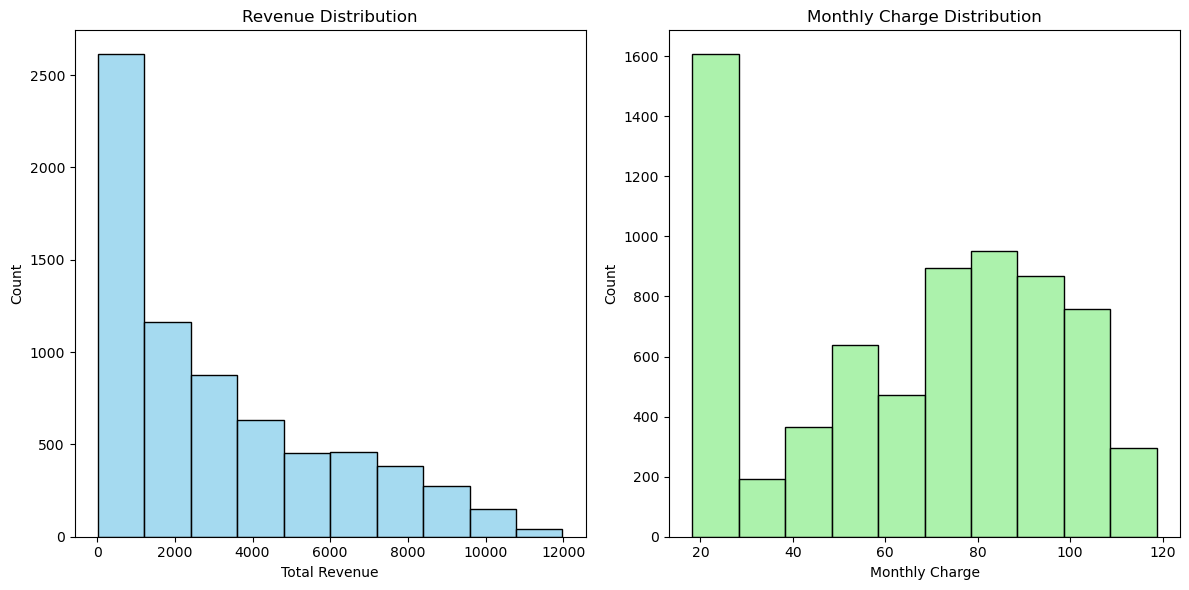

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for Age using seaborn
sns.histplot(telco_final['Total Revenue'], bins=10, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title('Revenue Distribution')

# Plot histogram for Monthly Charge using seaborn
sns.histplot(telco_final['Monthly Charge'], bins=10, color='lightgreen', edgecolor='black', ax=axs[1])
axs[1].set_title('Monthly Charge Distribution')

plt.tight_layout()
plt.show()


A furthur split of total revenue is seen in the piechart below with respect to it's different components.

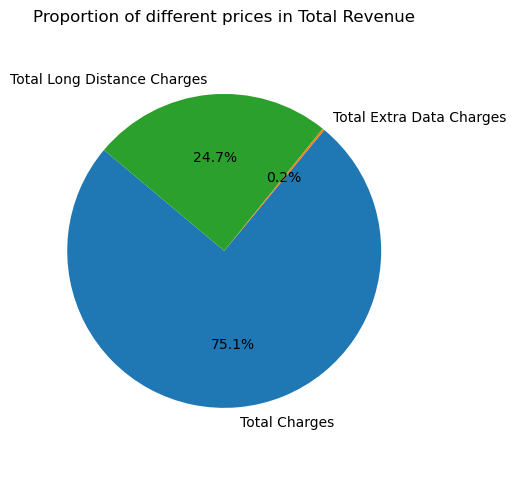

In [56]:
# Create a pie chart
plt.figure(figsize=(5, 5))
labels = ['Total Charges','Total Extra Data Charges','Total Long Distance Charges']
sizes = [telco_final['Total Charges'].sum(),telco_final['Total Extra Data Charges'].sum(),telco_final['Total Long Distance Charges'].sum()]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of different prices in Total Revenue')
plt.axis('equal')
plt.tight_layout()
plt.show()

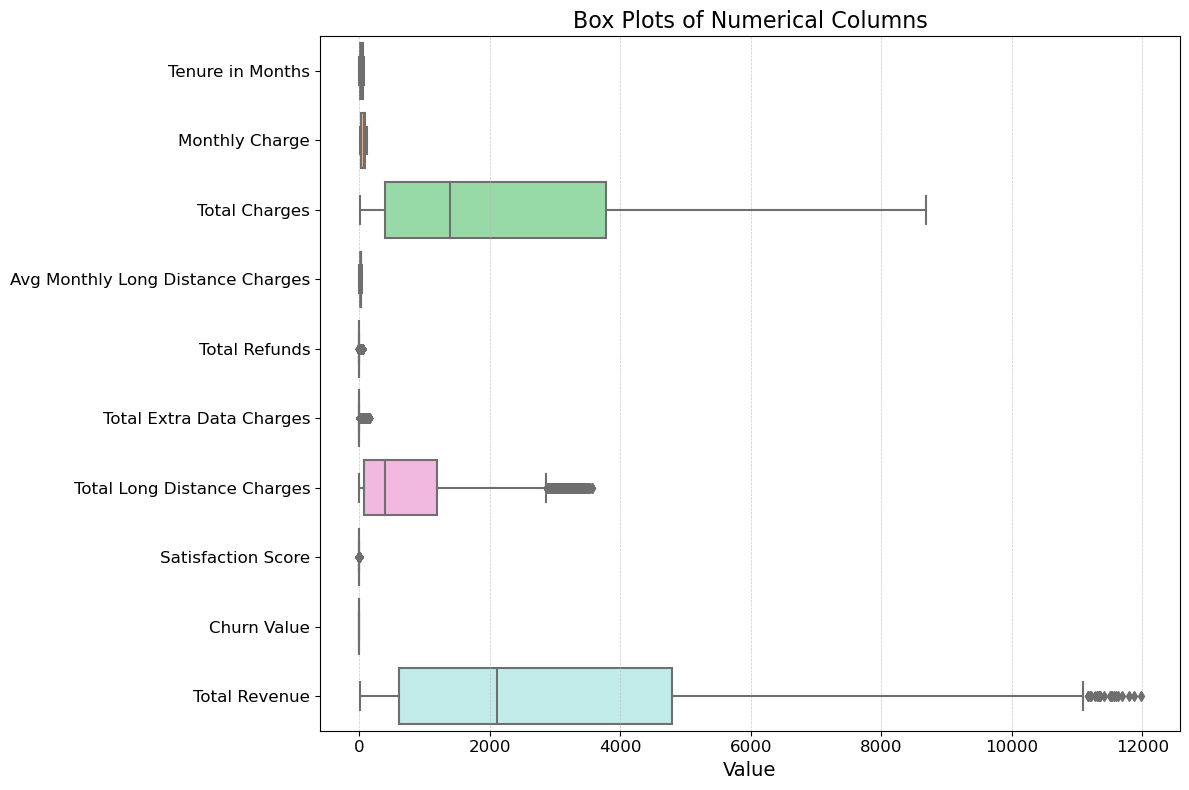

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming telco_final is your DataFrame containing the data
# Example DataFrame
# telco_final = ...

# List of numerical columns
numerical_columns = ['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Avg Monthly Long Distance Charges',
                     'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
                     'Satisfaction Score', 'Churn Value', 'Total Revenue']

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=telco_final[numerical_columns], orient='h', palette='pastel')
plt.title('Box Plots of Numerical Columns', fontsize=16)
plt.xlabel('Value', fontsize=14)
#plt.ylabel('Numerical Columns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


There are multiple outliers in Total Long Distance Charges column and Total Revenue Column, which have been efficiently handled

In [58]:
telco_final_heatmap = telco_final[['Tenure in Months', 'Total Revenue','Churn Value', 'Satisfaction Score']]

In [59]:
telco_final_heatmap2 = telco_final[['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Extra Data Charges','Total Long Distance Charges','Satisfaction Score','Churn Value','Total Revenue' ]]

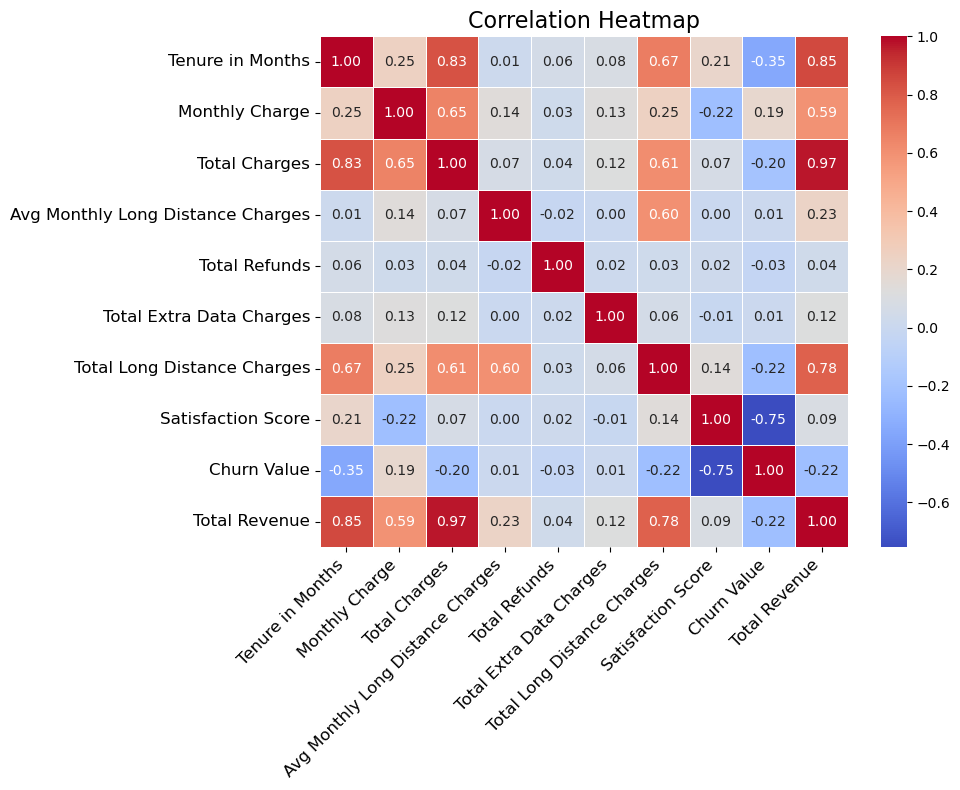

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming telco_final_heatap is your DataFrame containing the data
# Example DataFrame
# telco_final_heatap = ...

# Plot the heatmap with adjusted annotation parameters
plt.figure(figsize=(10, 8))
sns.heatmap(telco_final_heatmap2.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Adjust the font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Rotate the annotations for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

With the output label of Churn Value, Satisfaction score has a very high negative correlation. With the other output label of total revenue, most of the columns that correlate are the columns that directly impact the calculation of total revenue. Additional categorical columns need to be explored which might be impacting both total churn and revenue generated.

From the above chart we can identify there is multicollinearity between columns and most of them need to be dropped.

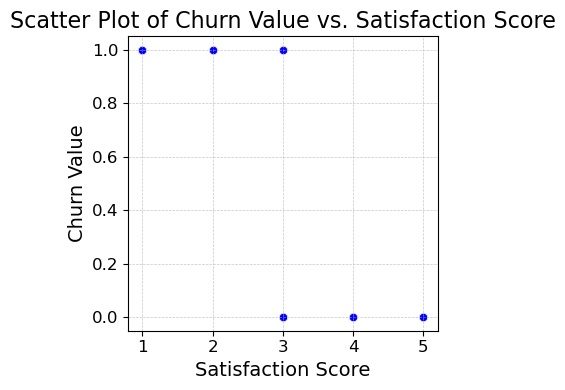

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming telco_final is your DataFrame containing the data
# Example DataFrame
# telco_final = ...

# Plot scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(data=telco_final, x='Satisfaction Score', y='Churn Value', color='blue')
plt.title('Scatter Plot of Churn Value vs. Satisfaction Score', fontsize=16)
plt.xlabel('Satisfaction Score', fontsize=14)
plt.ylabel('Churn Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


Customers who have atleast 4 satisfaction score have not churned out. It's only the customers who have a score less than 3 that have churned out.

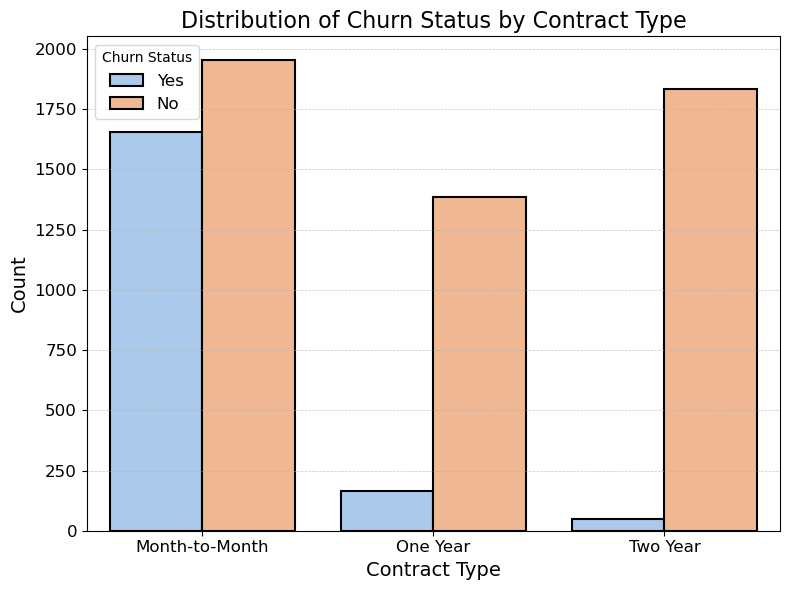

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming telco_final is your DataFrame containing the data
# Example DataFrame
# telco_final = ...

# Plot bar chart with solid black border
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_final, x='Contract', hue='Churn Label', palette='pastel', edgecolor='black', linewidth=1.5)
plt.title('Distribution of Churn Status by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Churn Status', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


A monthly contract is the biggest contributor to churn

C:\Users\bhuvv\AppData\Local\Temp\ipykernel_18416\855748547.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', df['Satisfaction Score'].nunique())


<Figure size 800x600 with 0 Axes>

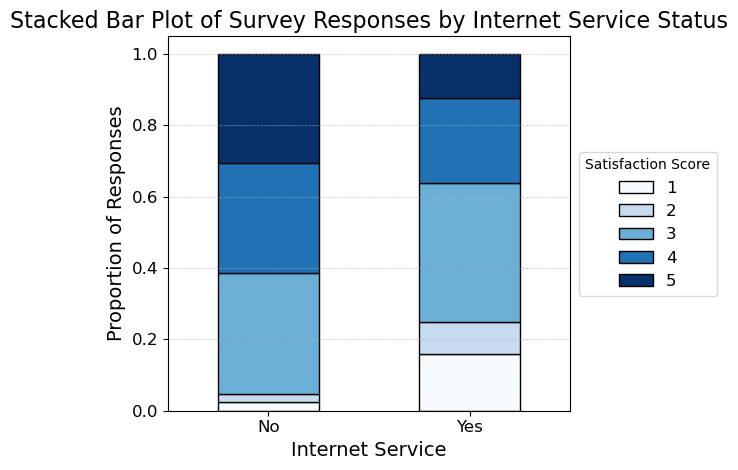

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
data = telco_final[['Customer ID', 'Internet Service', 'Satisfaction Score']]

df = pd.DataFrame(data)

# Define a sequential colormap based on satisfaction score
cmap = plt.cm.get_cmap('Blues', df['Satisfaction Score'].nunique())

# Calculate the proportion of responses by "Online Security" status
survey_proportions = df.groupby('Internet Service')['Satisfaction Score'].value_counts(normalize=True).unstack().fillna(0)

# Plot stacked bar plot with colored bars based on satisfaction score
plt.figure(figsize=(8, 6))
survey_proportions.plot(kind='bar', stacked=True, colormap=cmap, edgecolor='black')
plt.title('Stacked Bar Plot of Survey Responses by Internet Service Status', fontsize=16)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('Proportion of Responses', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Satisfaction Score', fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend to the right
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Poor rating on internet service shows that it is also a reason for churn. We see below the split of people who have taken the internet service.

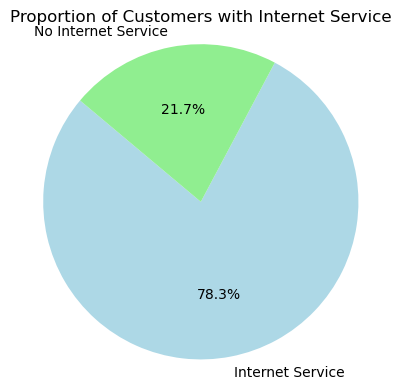

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

# Calculate the number of customers with internet service
internet_service_customers = telco_final[telco_final['Internet Service'] != 'No']

# Calculate the number of customers without internet service
no_internet_service_customers = telco_final[telco_final['Internet Service'] == 'No']

# Count the number of customers in each category
num_internet_service_customers = len(internet_service_customers)
num_no_internet_service_customers = len(no_internet_service_customers)
total_customers = len(telco_final)

# Calculate proportions
proportion_internet_service = num_internet_service_customers / total_customers
proportion_no_internet_service = num_no_internet_service_customers / total_customers

# Create a pie chart
labels = ['Internet Service', 'No Internet Service']
sizes = [proportion_internet_service, proportion_no_internet_service]
colors = ['lightblue', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers with Internet Service')
plt.axis('equal')
plt.tight_layout()
plt.show()


C:\Users\bhuvv\AppData\Local\Temp\ipykernel_18416\738914225.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Internet Type', y='Monthly Charge', data=telco_final, jitter=True, palette='Set2')


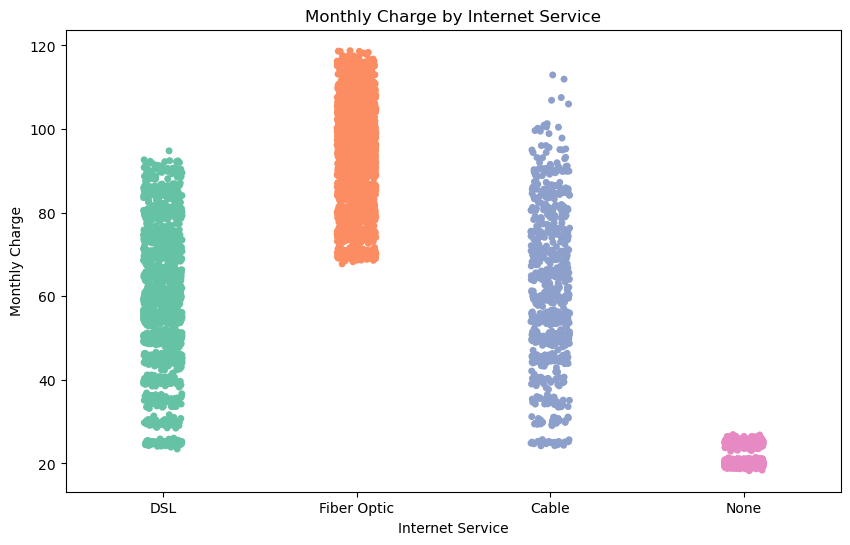

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a strip plot for Internet Service vs Monthly Charge
plt.figure(figsize=(10, 6))
sns.stripplot(x='Internet Type', y='Monthly Charge', data=telco_final, jitter=True, palette='Set2')
plt.title('Monthly Charge by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charge')
plt.show()

## Data Cleaning

## Dropping columns which are not relevant for the use case:

In [66]:
df = pd.read_csv('telco_final.csv')

In [67]:
columns_to_drop = [
    'Unnamed: 0',
    'Paperless Billing',
    'Country',
    'State',
    'Under 30',
    'Senior Citizen',
    'Lat Long',
    'Churn Label',
    'Churn Value'
]

df = df.drop(columns=columns_to_drop)

print(df.columns)


Index(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status',
       'Churn Category', 'Churn Reason', 'Population', 'Unemployment Rate'],
      dtype='object')


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   Zip Code                           7043 non-null   int64  
 8   Latitude                           7043 non-null   float64
 9   Longitude                          7043 non-null   float64
 10  Quarter                            7043 non-null   object 
 11  Referred a Friend                  7043 non-null   objec

In [69]:
df = df.drop_duplicates()
df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category,Churn Reason,Population,Unemployment Rate
0,8779-QRDMV,Male,78,No,No,0,Los Angeles,90022,34.023810,-118.156582,...,0.00,20,0.00,59.65,3,Churned,Competitor,Competitor offered more data,64147.0,5.4%
1,7495-OOKFY,Female,74,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,...,0.00,0,390.80,1024.10,3,Churned,Competitor,Competitor made better offer,52008.0,6.9%
2,1658-BYGOY,Male,71,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,...,45.61,0,203.94,1910.88,2,Churned,Competitor,Competitor made better offer,44897.0,7.3%
3,4598-XLKNJ,Female,78,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,...,13.43,0,494.00,2995.07,2,Churned,Dissatisfaction,Limited range of services,23370.0,8.0%
4,4846-WHAFZ,Female,80,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,...,0.00,0,234.21,3102.36,2,Churned,Price,Extra data charges,25949.0,5.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,0,Landers,92285,34.341737,-116.539416,...,19.31,0,1639.44,3039.53,5,Stayed,NaN,NaN,2726.0,13.6%
7039,6840-RESVB,Male,38,Yes,Yes,2,Adelanto,92301,34.667815,-117.536183,...,48.23,0,865.20,2807.47,3,Stayed,NaN,NaN,38565.0,8.7%
7040,2234-XADUH,Female,30,Yes,Yes,2,Amboy,92304,34.559882,-115.637164,...,45.38,0,2135.52,9453.04,4,Stayed,NaN,NaN,0.0,NaN
7041,4801-JZAZL,Female,32,Yes,Yes,2,Angelus Oaks,92305,34.167800,-116.864330,...,27.24,0,0.00,319.21,4,Stayed,NaN,NaN,500.0,NaN


In [70]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Dependents                              0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan            

In [71]:
print(df.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status',
       'Churn Category', 'Churn Reason', 'Population', 'Unemployment Rate'],
      dtype='object')


## Relevant data for my use case: 

In [72]:
relevant_numerical_cols = [
    'Tenure in Months', 
    'Monthly Charge', 
    'Total Charges', 
    'Avg Monthly Long Distance Charges', 
    'Total Refunds', 
    'Total Extra Data Charges', 
    'Total Long Distance Charges', 
    'Satisfaction Score',
]

## Dropping the negative values from the data 

In [73]:
# Dropping negative values from relevant columns:
# Remove rows with negative values in relevant numerical columns
for col in relevant_numerical_cols:
    df = df[df[col] >= 0]


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   Zip Code                           7043 non-null   int64  
 8   Latitude                           7043 non-null   float64
 9   Longitude                          7043 non-null   float64
 10  Quarter                            7043 non-null   object 
 11  Referred a Friend                  7043 non-null   objec

## Handling the outliers in the relevant columns

In [75]:
#Outlier handling
for col in relevant_numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category,Churn Reason,Population,Unemployment Rate
1,7495-OOKFY,Female,74,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,...,0.0,0,390.80,1024.10,3,Churned,Competitor,Competitor made better offer,52008.0,6.9%
4,4846-WHAFZ,Female,80,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,...,0.0,0,234.21,3102.36,2,Churned,Price,Extra data charges,25949.0,5.3%
6,0390-DCFDQ,Female,76,Yes,Yes,2,Los Alamitos,90720,33.794990,-118.065591,...,0.0,0,15.28,85.73,2,Churned,Other,Don't know,23673.0,5.6%
8,2656-FMOKZ,Female,70,No,Yes,2,Pasadena,91106,34.139402,-118.128658,...,0.0,0,661.05,1806.75,2,Churned,Dissatisfaction,Limited range of services,23813.0,5.3%
12,9514-JDSKI,Male,77,Yes,No,0,El Monte,91732,34.074492,-118.014620,...,0.0,0,0.00,40.20,2,Churned,Dissatisfaction,Limited range of services,58888.0,5.4%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,6075-SLNIL,Male,47,No,No,0,Desert Center,92239,33.889605,-115.257009,...,0.0,0,254.98,3946.18,3,Stayed,NaN,NaN,296.0,13.6%
7021,9347-AERRL,Male,60,Yes,No,0,Desert Hot Springs,92240,33.948558,-116.516976,...,0.0,0,831.22,1317.42,5,Stayed,NaN,NaN,40755.0,6.5%
7025,1471-GIQKQ,Female,37,No,No,0,Niland,92257,33.345825,-115.596574,...,0.0,0,44.98,94.93,3,Joined,NaN,NaN,1186.0,NaN
7034,0871-OPBXW,Female,57,No,No,0,Escondido,92027,33.141265,-116.967221,...,0.0,0,13.70,52.95,3,Joined,NaN,NaN,55750.0,NaN


In [76]:
# Handling missing data for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handling missing data for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [77]:
df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category,Churn Reason,Population,Unemployment Rate
1,7495-OOKFY,Female,74,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,...,0.0,0,390.80,1024.10,3,Churned,Competitor,Competitor made better offer,52008.0,6.9%
4,4846-WHAFZ,Female,80,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,...,0.0,0,234.21,3102.36,2,Churned,Price,Extra data charges,25949.0,5.3%
6,0390-DCFDQ,Female,76,Yes,Yes,2,Los Alamitos,90720,33.794990,-118.065591,...,0.0,0,15.28,85.73,2,Churned,Other,Don't know,23673.0,5.6%
8,2656-FMOKZ,Female,70,No,Yes,2,Pasadena,91106,34.139402,-118.128658,...,0.0,0,661.05,1806.75,2,Churned,Dissatisfaction,Limited range of services,23813.0,5.3%
12,9514-JDSKI,Male,77,Yes,No,0,El Monte,91732,34.074492,-118.014620,...,0.0,0,0.00,40.20,2,Churned,Dissatisfaction,Limited range of services,58888.0,5.4%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,6075-SLNIL,Male,47,No,No,0,Desert Center,92239,33.889605,-115.257009,...,0.0,0,254.98,3946.18,3,Stayed,Competitor,Competitor made better offer,296.0,13.6%
7021,9347-AERRL,Male,60,Yes,No,0,Desert Hot Springs,92240,33.948558,-116.516976,...,0.0,0,831.22,1317.42,5,Stayed,Competitor,Competitor made better offer,40755.0,6.5%
7025,1471-GIQKQ,Female,37,No,No,0,Niland,92257,33.345825,-115.596574,...,0.0,0,44.98,94.93,3,Joined,Competitor,Competitor made better offer,1186.0,5.7%
7034,0871-OPBXW,Female,57,No,No,0,Escondido,92027,33.141265,-116.967221,...,0.0,0,13.70,52.95,3,Joined,Competitor,Competitor made better offer,55750.0,5.7%


In [78]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Dependents                           0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV             

## Statistical analysis

In [79]:
import matplotlib.pyplot as plt
from scipy import stats

## Central Tendency

In [80]:
# Central Tendency
print("Mean:")
print(df[relevant_numerical_cols].mean())
print("\nMedian:")
print(df[relevant_numerical_cols].median())
print("\nMode:")
print(df[relevant_numerical_cols].mode().iloc[0])


Mean:
Tenure in Months                       32.658383
Monthly Charge                         60.821277
Total Charges                        2187.433090
Avg Monthly Long Distance Charges      22.341876
Total Refunds                           0.000000
Total Extra Data Charges                0.000000
Total Long Distance Charges           702.408472
Satisfaction Score                      3.585455
dtype: float64

Median:
Tenure in Months                       30.00
Monthly Charge                         64.90
Total Charges                        1307.80
Avg Monthly Long Distance Charges      22.23
Total Refunds                           0.00
Total Extra Data Charges                0.00
Total Long Distance Charges           413.91
Satisfaction Score                      3.00
dtype: float64

Mode:
Tenure in Months                      1.00
Monthly Charge                       20.05
Total Charges                        19.75
Avg Monthly Long Distance Charges     0.00
Total Refunds           

## Dispersion

In [81]:
print(df[relevant_numerical_cols].var())
print(df[relevant_numerical_cols].std())

Tenure in Months                     5.887347e+02
Monthly Charge                       9.535917e+02
Total Charges                        4.906155e+06
Avg Monthly Long Distance Charges    2.270705e+02
Total Refunds                        0.000000e+00
Total Extra Data Charges             0.000000e+00
Total Long Distance Charges          5.660403e+05
Satisfaction Score                   7.949066e-01
dtype: float64
Tenure in Months                       24.263857
Monthly Charge                         30.880280
Total Charges                        2214.984110
Avg Monthly Long Distance Charges      15.068858
Total Refunds                           0.000000
Total Extra Data Charges                0.000000
Total Long Distance Charges           752.356505
Satisfaction Score                      0.891575
dtype: float64


# QQ Plot

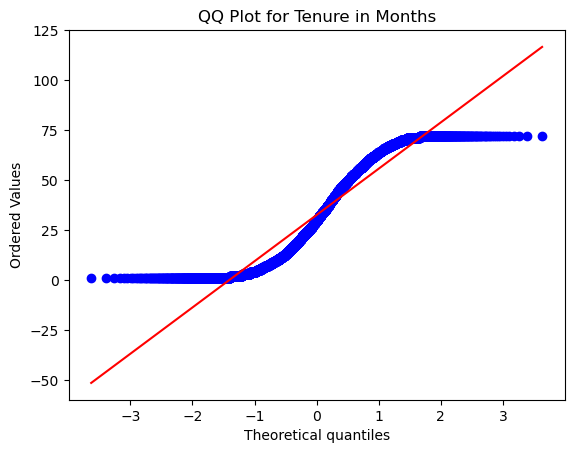

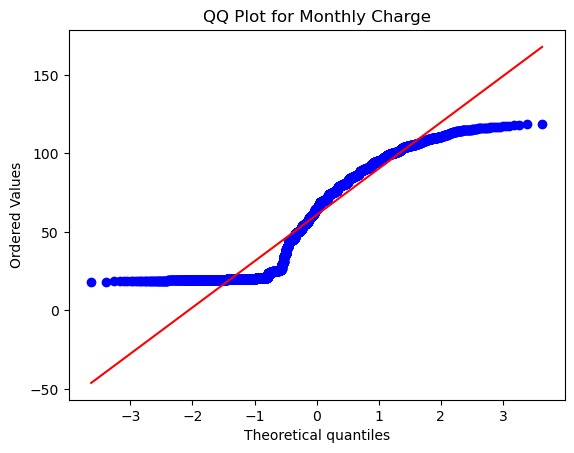

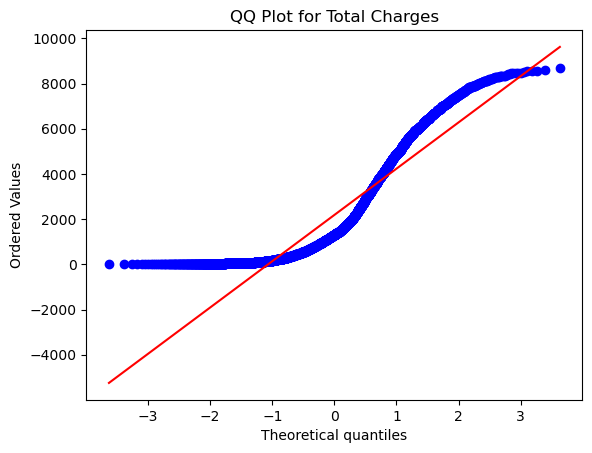

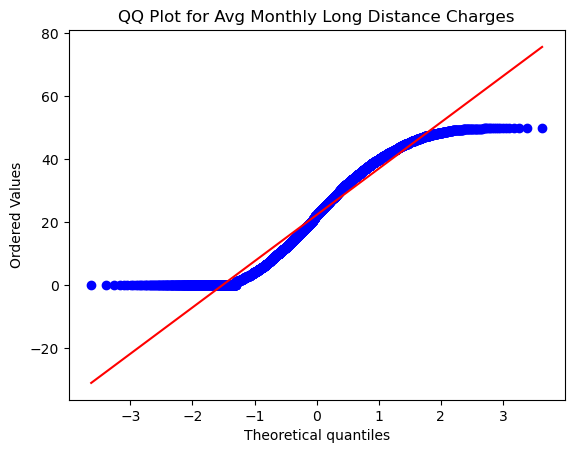

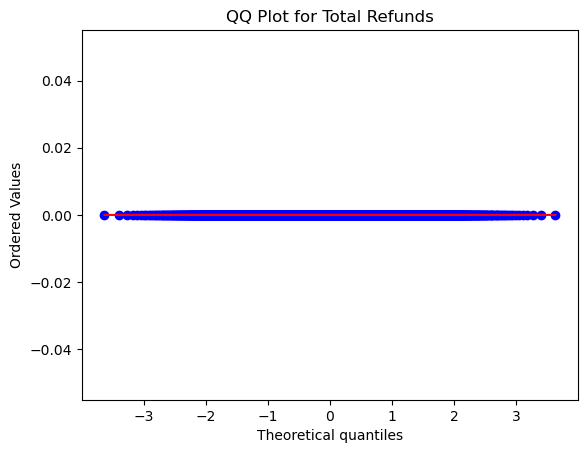

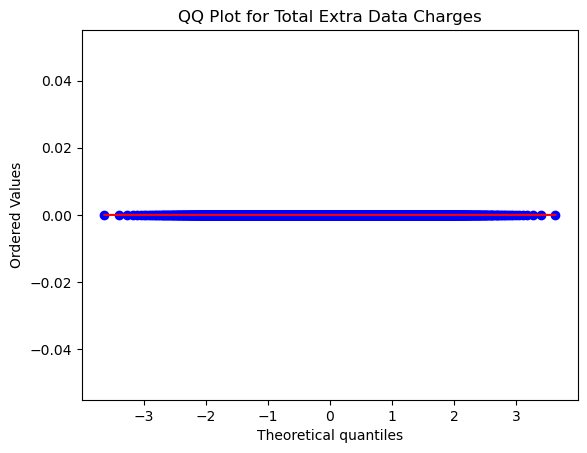

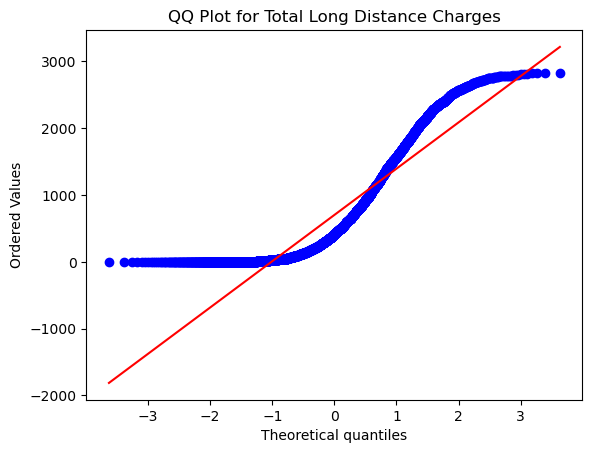

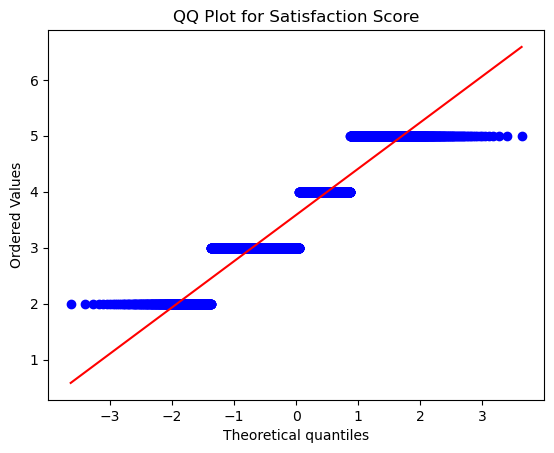

In [82]:
for col in relevant_numerical_cols:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
    plt.show() 

## Log Transformation

In [83]:
import numpy as np

# Apply log transformation after making sure there are no zero or negative values
for col in relevant_numerical_cols:
    # Replace zeros with the smallest positive float
    df[col] = df[col].replace(0, np.nextafter(0, 1))
    # Apply log transformation
    df[f'log_{col}'] = np.log(df[col])

## Square Root Transformation

In [84]:
for col in relevant_numerical_cols:
    df[f'sqrt_{col}'] = np.sqrt(df[col])

## Yeo-Johnson Transformation 

In [85]:
# Assuming df is your DataFrame and relevant_numerical_cols contains the columns you want to transform
import pandas as pd
from sklearn.preprocessing import power_transform
import matplotlib.pyplot as plt
import scipy.stats as stats


yeo_johnson_transformed = power_transform(df[relevant_numerical_cols], method='yeo-johnson')

# Create a new DataFrame for the transformed data
df_transformed = pd.DataFrame(yeo_johnson_transformed, columns=relevant_numerical_cols)

# Replace the original columns in the DataFrame with the transformed ones
df[relevant_numerical_cols] = df_transformed

